In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
to_process_data = pd.read_csv('cs-training.csv')
to_process_data.median()

Unnamed: 0                              75000.500000
SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        0.154181
age                                        52.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.366508
MonthlyIncome                            5400.000000
NumberOfOpenCreditLinesAndLoans             8.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          0.000000
dtype: float64

In [18]:
# Handling missing values by using Median Imputation !

to_process_data['MonthlyIncome'].fillna(to_process_data['MonthlyIncome'].median(), inplace=True)
to_process_data['NumberOfDependents'].fillna(to_process_data['NumberOfDependents'].median(), inplace=True)
# to_process_data.isnull().sum()
processed_data = to_process_data.copy()
processed_data.isnull().sum()

C:\Users\Saad\AppData\Local\Temp\ipykernel_26628\3999255195.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to_process_data['MonthlyIncome'].fillna(to_process_data['MonthlyIncome'].median(), inplace=True)
C:\Users\Saad\AppData\Local\Temp\ipykernel_26628\3999255195.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [19]:
## now splitting the data into features and target variable

x = processed_data.drop(columns=['SeriousDlqin2yrs', 'Unnamed: 0'])
y = processed_data['SeriousDlqin2yrs']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
feature_names = x_train.columns

In [ ]:
# scaling the data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)       # do not fit test data to avoid data leakage 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120000, 10), (30000, 10), (120000,), (30000,))

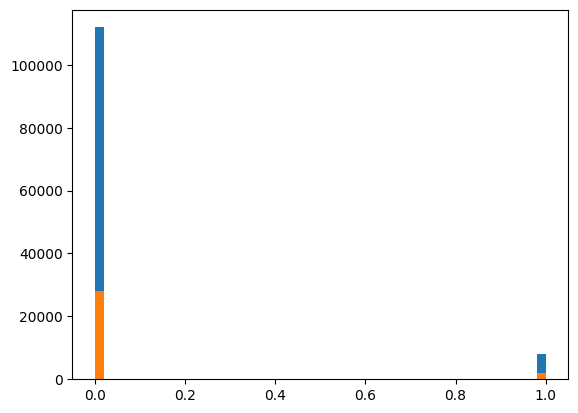

In [22]:
plot.hist(y_train, bins=50, label='train')
plot.hist(y_test, bins=50, label='test')
plot.show()

In [32]:
x_train_scaled = pd.DataFrame(x_train, columns=feature_names)
x_test_scaled = pd.DataFrame(x_test, columns=feature_names)
y_train = pd.DataFrame(y_train, columns=['SeriousDlqin2yrs'])
y_test = pd.DataFrame(y_test, columns=['SeriousDlqin2yrs'])       # guess it worked !
print(type(x_train_scaled))
print(type(x_test_scaled))

x_train_scaled.to_csv('x_train_scaled.csv', index=False)
x_test_scaled.to_csv('x_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

x_train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.022803,-1.576975,-0.100746,-0.180840,-0.151997,-0.672522,-0.063764,-0.900750,-0.057706,-0.666180
1,-0.020393,0.184209,-0.100746,-0.180416,-0.334990,0.493412,-0.063764,-0.017611,-0.057706,-0.666180
2,-0.022803,-0.628645,-0.100746,-0.180824,-0.164834,-1.255488,-0.063764,-0.900750,-0.057706,2.944145
3,-0.021217,-0.831859,-0.100746,-0.180815,0.187732,-1.255488,-0.063764,-0.900750,-0.057706,3.846727
4,-0.022803,-1.170548,-0.100746,-0.180777,-0.045659,0.687734,-0.063764,-0.017611,-0.057706,-0.666180
